# 1. Data Overview & Structure

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


Load dataset

In [8]:
dataset = pd.read_csv('/Users/tamilselavans/Downloads/student_performance/src/dataset/StudentPerformanceFactors.csv')
dataset.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [9]:

dataset.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [13]:
dataset.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [12]:
# Calculate the mode of the column
mode_value = dataset['Teacher_Quality'].mode()[0]

# Replace missing values with the mode
dataset['Teacher_Quality'].fillna(mode_value, inplace=True)


# Calculate the mode of the column
mode_value = dataset['Parental_Education_Level'].mode()[0]

# Replace missing values with the mode
dataset['Parental_Education_Level'].fillna(mode_value, inplace=True)

mode_value = dataset['Distance_from_Home'].mode()[0]

# Replace missing values with the mode
dataset['Distance_from_Home'].fillna(mode_value, inplace=True)

shape

In [15]:
dataset.shape

(6607, 20)

# 2. Data Distribution Analysis

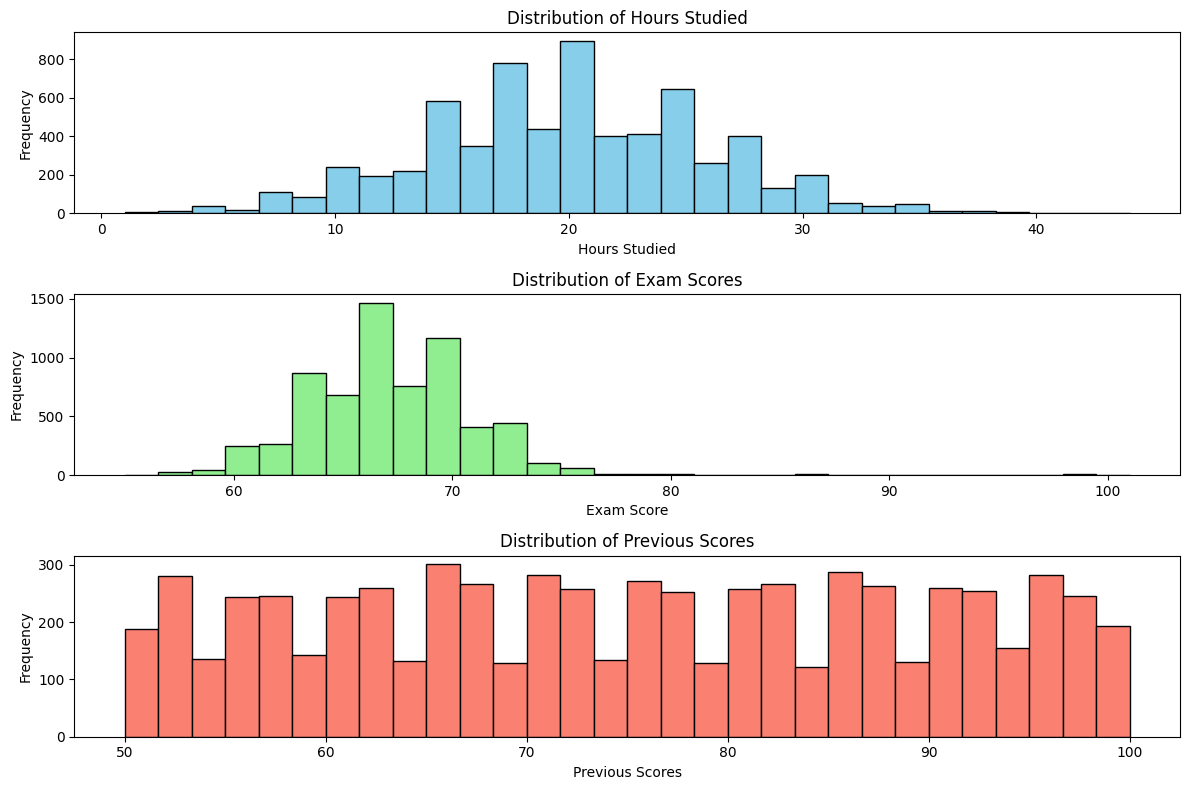

In [18]:
# Set up the figure size and grid layout
plt.figure(figsize=(12, 8))

# Plot histogram for 'Hours_Studied'
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.hist(dataset['Hours_Studied'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')

# Plot histogram for 'Exam_Score'
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.hist(dataset['Exam_Score'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')

# Plot histogram for 'Previous_Scores'
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.hist(dataset['Previous_Scores'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for each column
skewness_hours_studied = skew(dataset['Hours_Studied'].dropna())
kurtosis_hours_studied = kurtosis(dataset['Hours_Studied'].dropna())

skewness_exam_score = skew(dataset['Exam_Score'].dropna())
kurtosis_exam_score = kurtosis(dataset['Exam_Score'].dropna())

skewness_previous_scores = skew(dataset['Previous_Scores'].dropna())
kurtosis_previous_scores = kurtosis(dataset['Previous_Scores'].dropna())

# Print the results
print(f"Skewness of Hours Studied: {skewness_hours_studied}")
print(f"Kurtosis of Hours Studied: {kurtosis_hours_studied}")
print(f"Skewness of Exam Score: {skewness_exam_score}")
print(f"Kurtosis of Exam Score: {kurtosis_exam_score}")
print(f"Skewness of Previous Scores: {skewness_previous_scores}")
print(f"Kurtosis of Previous Scores: {kurtosis_previous_scores}")


Skewness of Hours Studied: 0.013495843983060038
Kurtosis of Hours Studied: 0.016849191490919235
Skewness of Exam Score: 1.6444348378369054
Kurtosis of Exam Score: 10.566513244494168
Skewness of Previous Scores: -0.003735685432260372
Kurtosis of Previous Scores: -1.1910872154885088


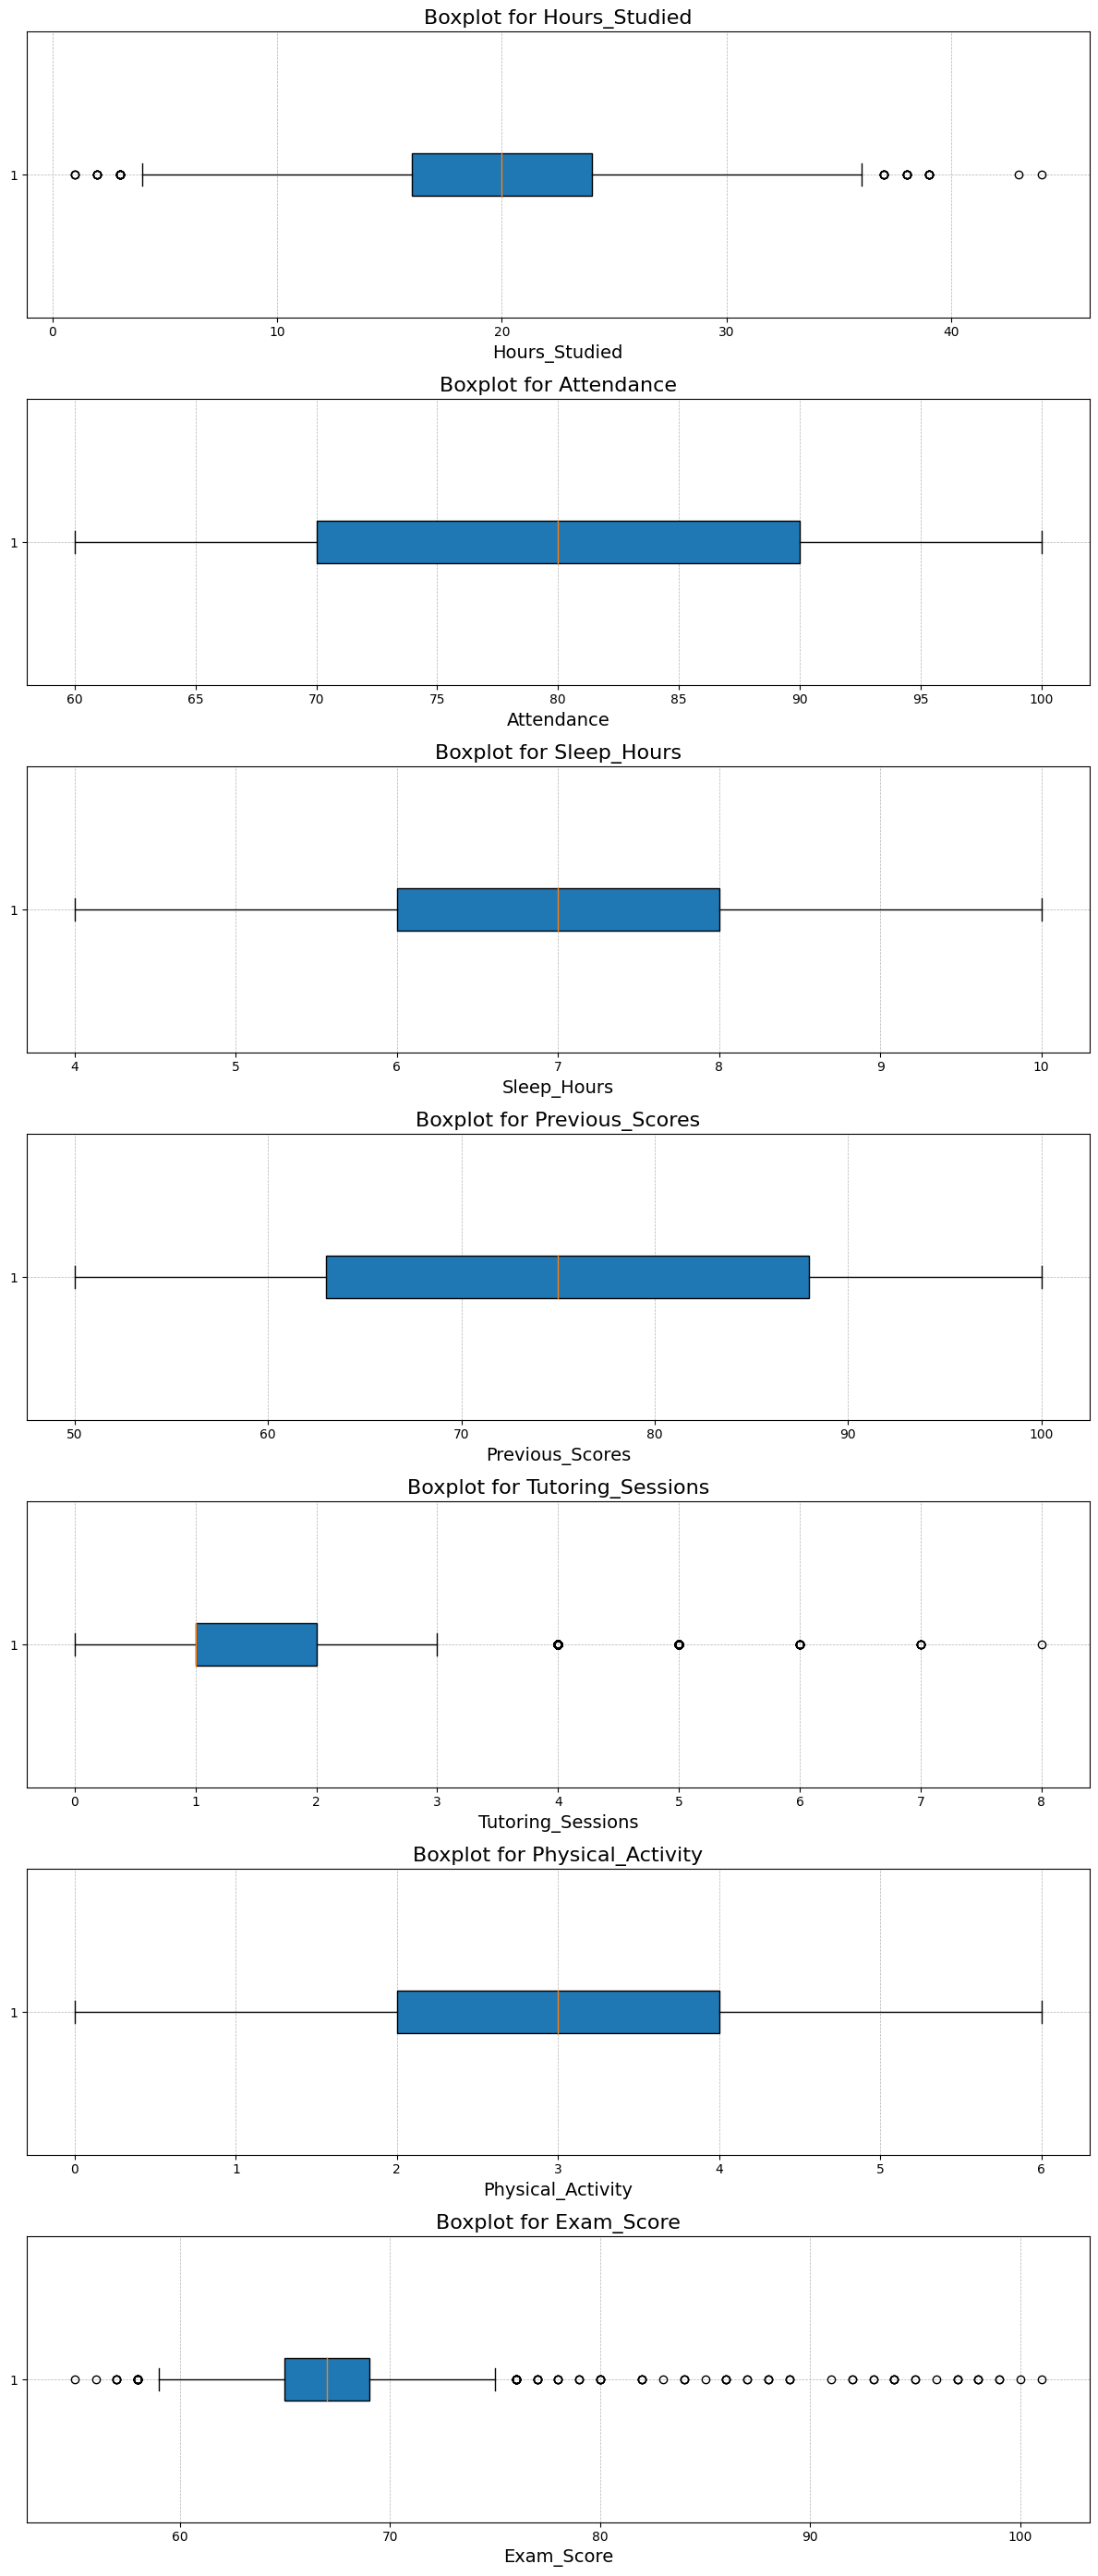

In [24]:
# Select only numerical columns
numerical_cols = dataset.select_dtypes(include=['float64', 'int64'])

# Define the number of rows based on the number of numerical columns
num_rows = len(numerical_cols.columns)

# Set a larger figure size for better visibility
plt.figure(figsize=(12, num_rows * 4))  # Adjust the 4 to a higher number if more space is needed per plot

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(num_rows, 1, i + 1)  # Define subplot
    plt.boxplot(dataset[col].dropna(), vert=False, patch_artist=True)  # Vertical boxplots, styled
    plt.title(f'Boxplot for {col}', fontsize=16)  # Set title with increased font size
    plt.xlabel(col, fontsize=14)  # Set x-label with increased font size
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Enable grid for easier reading

# Automatically adjust subplot params so that the subplot(s) fits into the figure area
plt.tight_layout()

# Display the plots
plt.show()

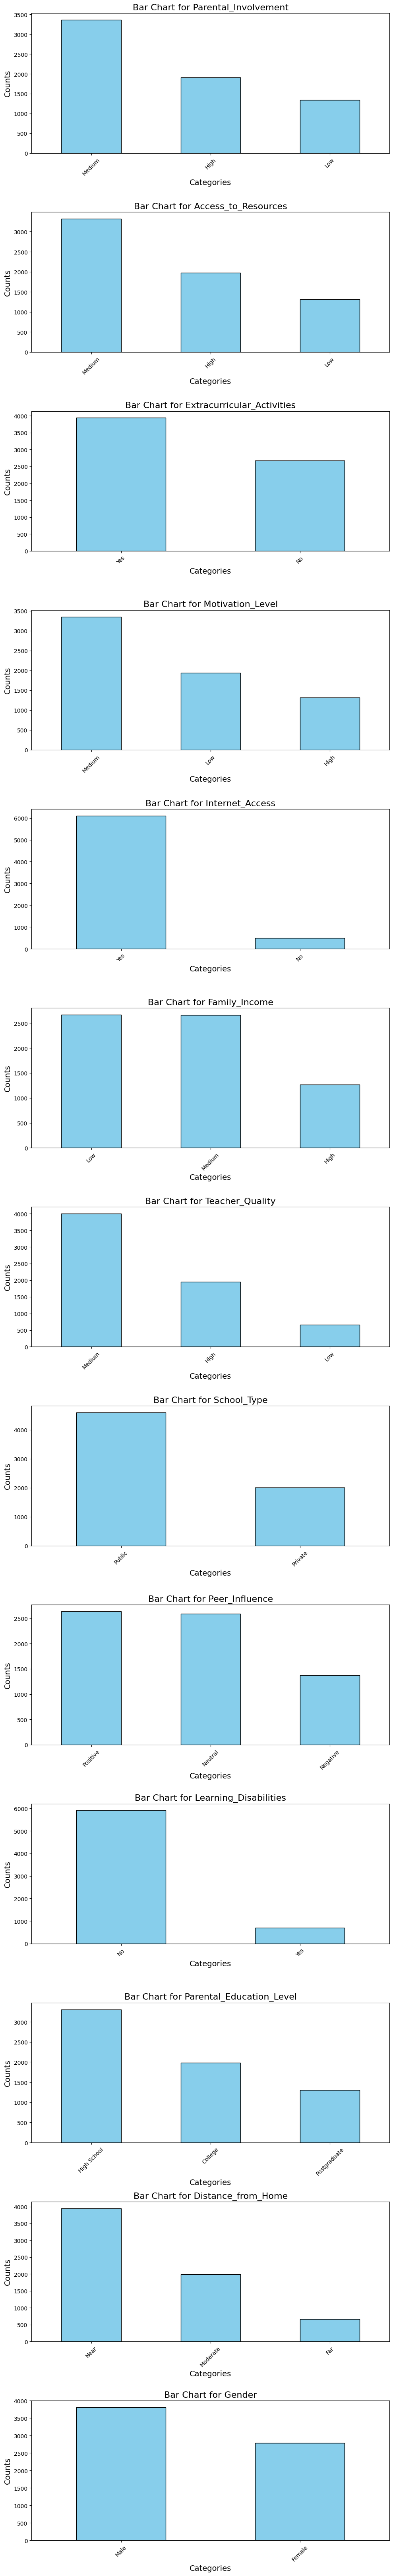

In [25]:
import matplotlib.pyplot as plt

# Select only categorical columns
categorical_cols = dataset.select_dtypes(include=['object', 'category'])

# Define the number of rows based on the number of categorical columns
num_rows = len(categorical_cols.columns)

# Set a larger figure size for better visibility
plt.figure(figsize=(10, num_rows * 5))  # Height is 5 times the number of plots

# Loop through each categorical column and create a bar chart
for i, col in enumerate(categorical_cols.columns):
    plt.subplot(num_rows, 1, i + 1)  # Define subplot
    dataset[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')  # Create a bar chart
    plt.title(f'Bar Chart for {col}', fontsize=16)  # Set title with increased font size
    plt.xlabel('Categories', fontsize=14)  # Set x-label with increased font size
    plt.ylabel('Counts', fontsize=14)  # Set y-label with increased font size
    plt.xticks(rotation=45)  # Rotate category labels for better visibility

# Automatically adjust subplot params so that the subplot(s) fits into the figure area
plt.tight_layout()

# Display the plots
plt.show()


outliers dectection

In [37]:
import numpy as np

# Select numeric columns only
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

def remove_outliers_iqr(df, numeric_columns):
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the dataset
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Apply IQR outlier removal for numeric columns
dataset_cleaned_iqr = remove_outliers_iqr(dataset, numeric_cols)
dataset = dataset_cleaned_iqr
# Check the result
print("Original dataset size:", dataset.shape)
print("Cleaned dataset size (IQR method):", dataset_cleaned_iqr.shape)


Original dataset size: (6054, 20)
Cleaned dataset size (IQR method): (6054, 20)


In [38]:
dataset.shape

(6054, 20)

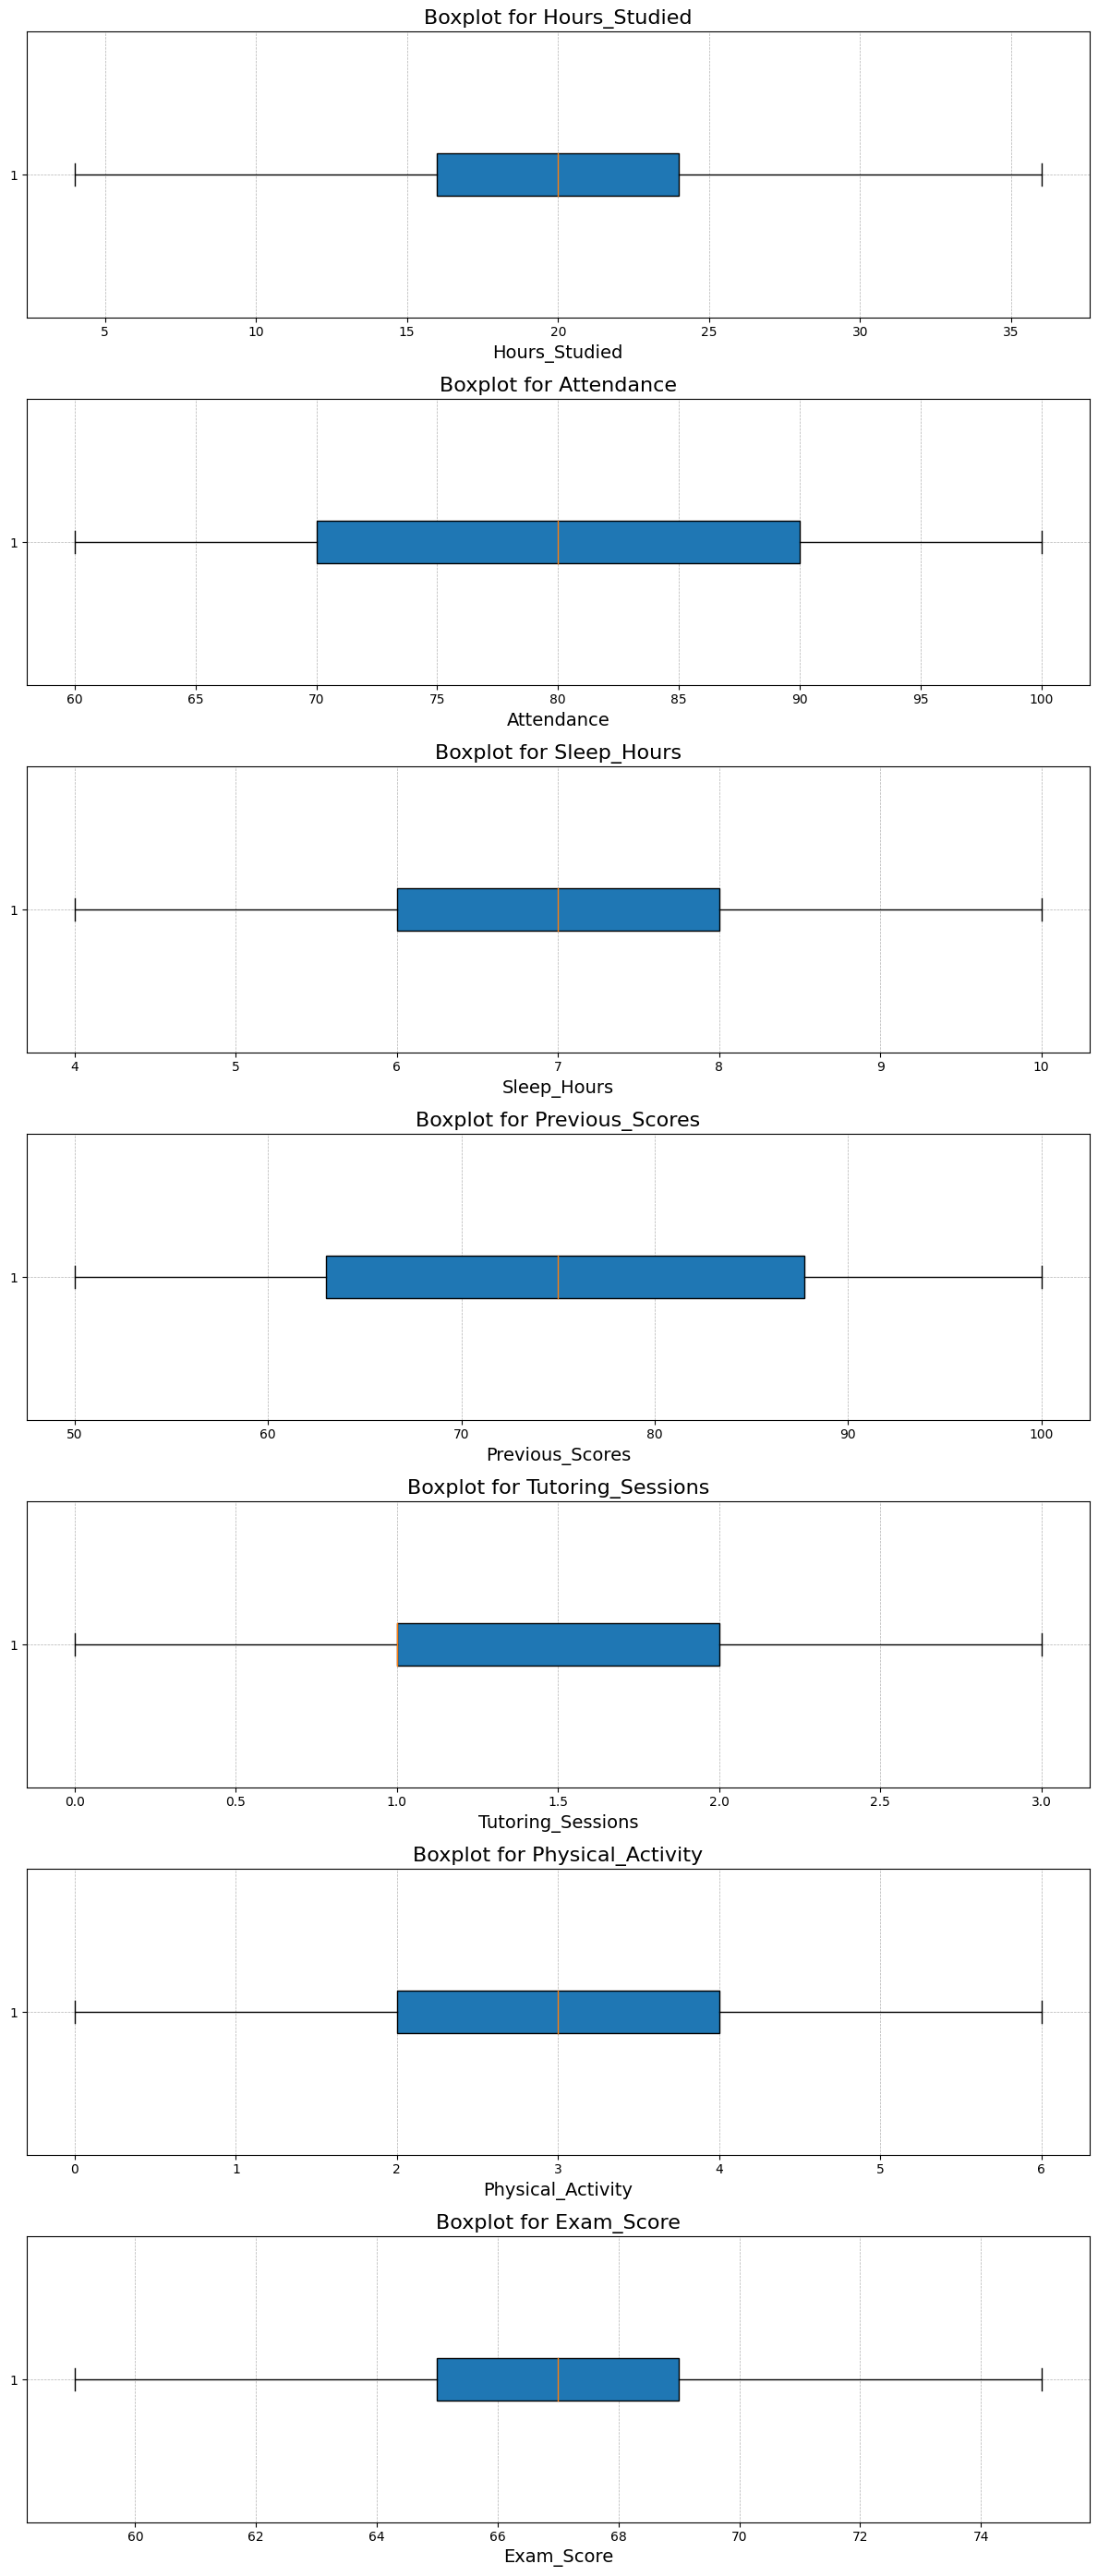

In [39]:
# Select only numerical columns
numerical_cols = dataset.select_dtypes(include=['float64', 'int64'])

# Define the number of rows based on the number of numerical columns
num_rows = len(numerical_cols.columns)

# Set a larger figure size for better visibility
plt.figure(figsize=(12, num_rows * 4))  # Adjust the 4 to a higher number if more space is needed per plot

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(num_rows, 1, i + 1)  # Define subplot
    plt.boxplot(dataset[col].dropna(), vert=False, patch_artist=True)  # Vertical boxplots, styled
    plt.title(f'Boxplot for {col}', fontsize=16)  # Set title with increased font size
    plt.xlabel(col, fontsize=14)  # Set x-label with increased font size
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Enable grid for easier reading

# Automatically adjust subplot params so that the subplot(s) fits into the figure area
plt.tight_layout()

# Display the plots
plt.show()

In [40]:
# Select numerical columns
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = dataset[numeric_cols].corr()

# Display correlation of Exam_Score with other columns
exam_score_corr = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print("Correlation of Exam_Score with other numerical columns:")
print(exam_score_corr)


Correlation of Exam_Score with other numerical columns:
Exam_Score           1.000000
Attendance           0.682257
Hours_Studied        0.500809
Previous_Scores      0.198775
Tutoring_Sessions    0.140999
Physical_Activity    0.030135
Sleep_Hours         -0.009101
Name: Exam_Score, dtype: float64


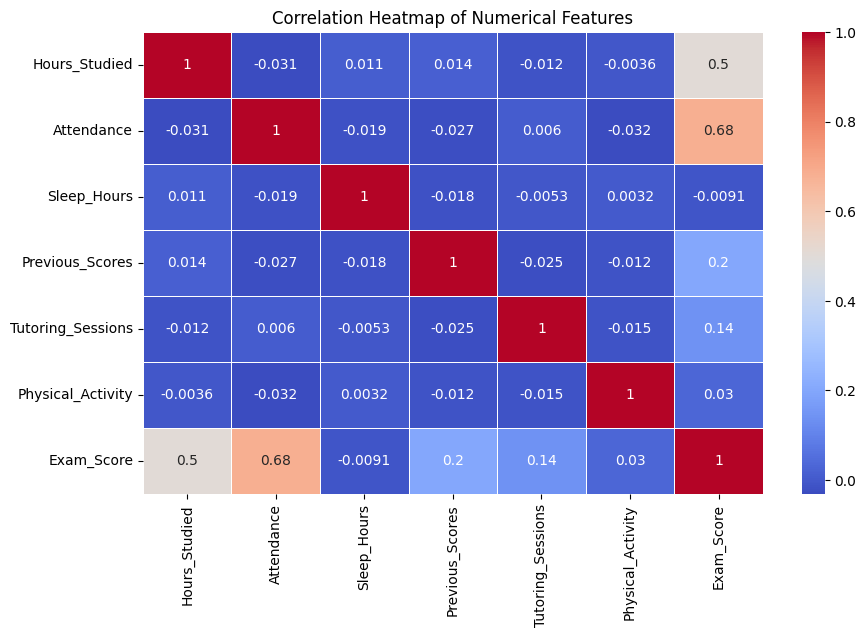

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


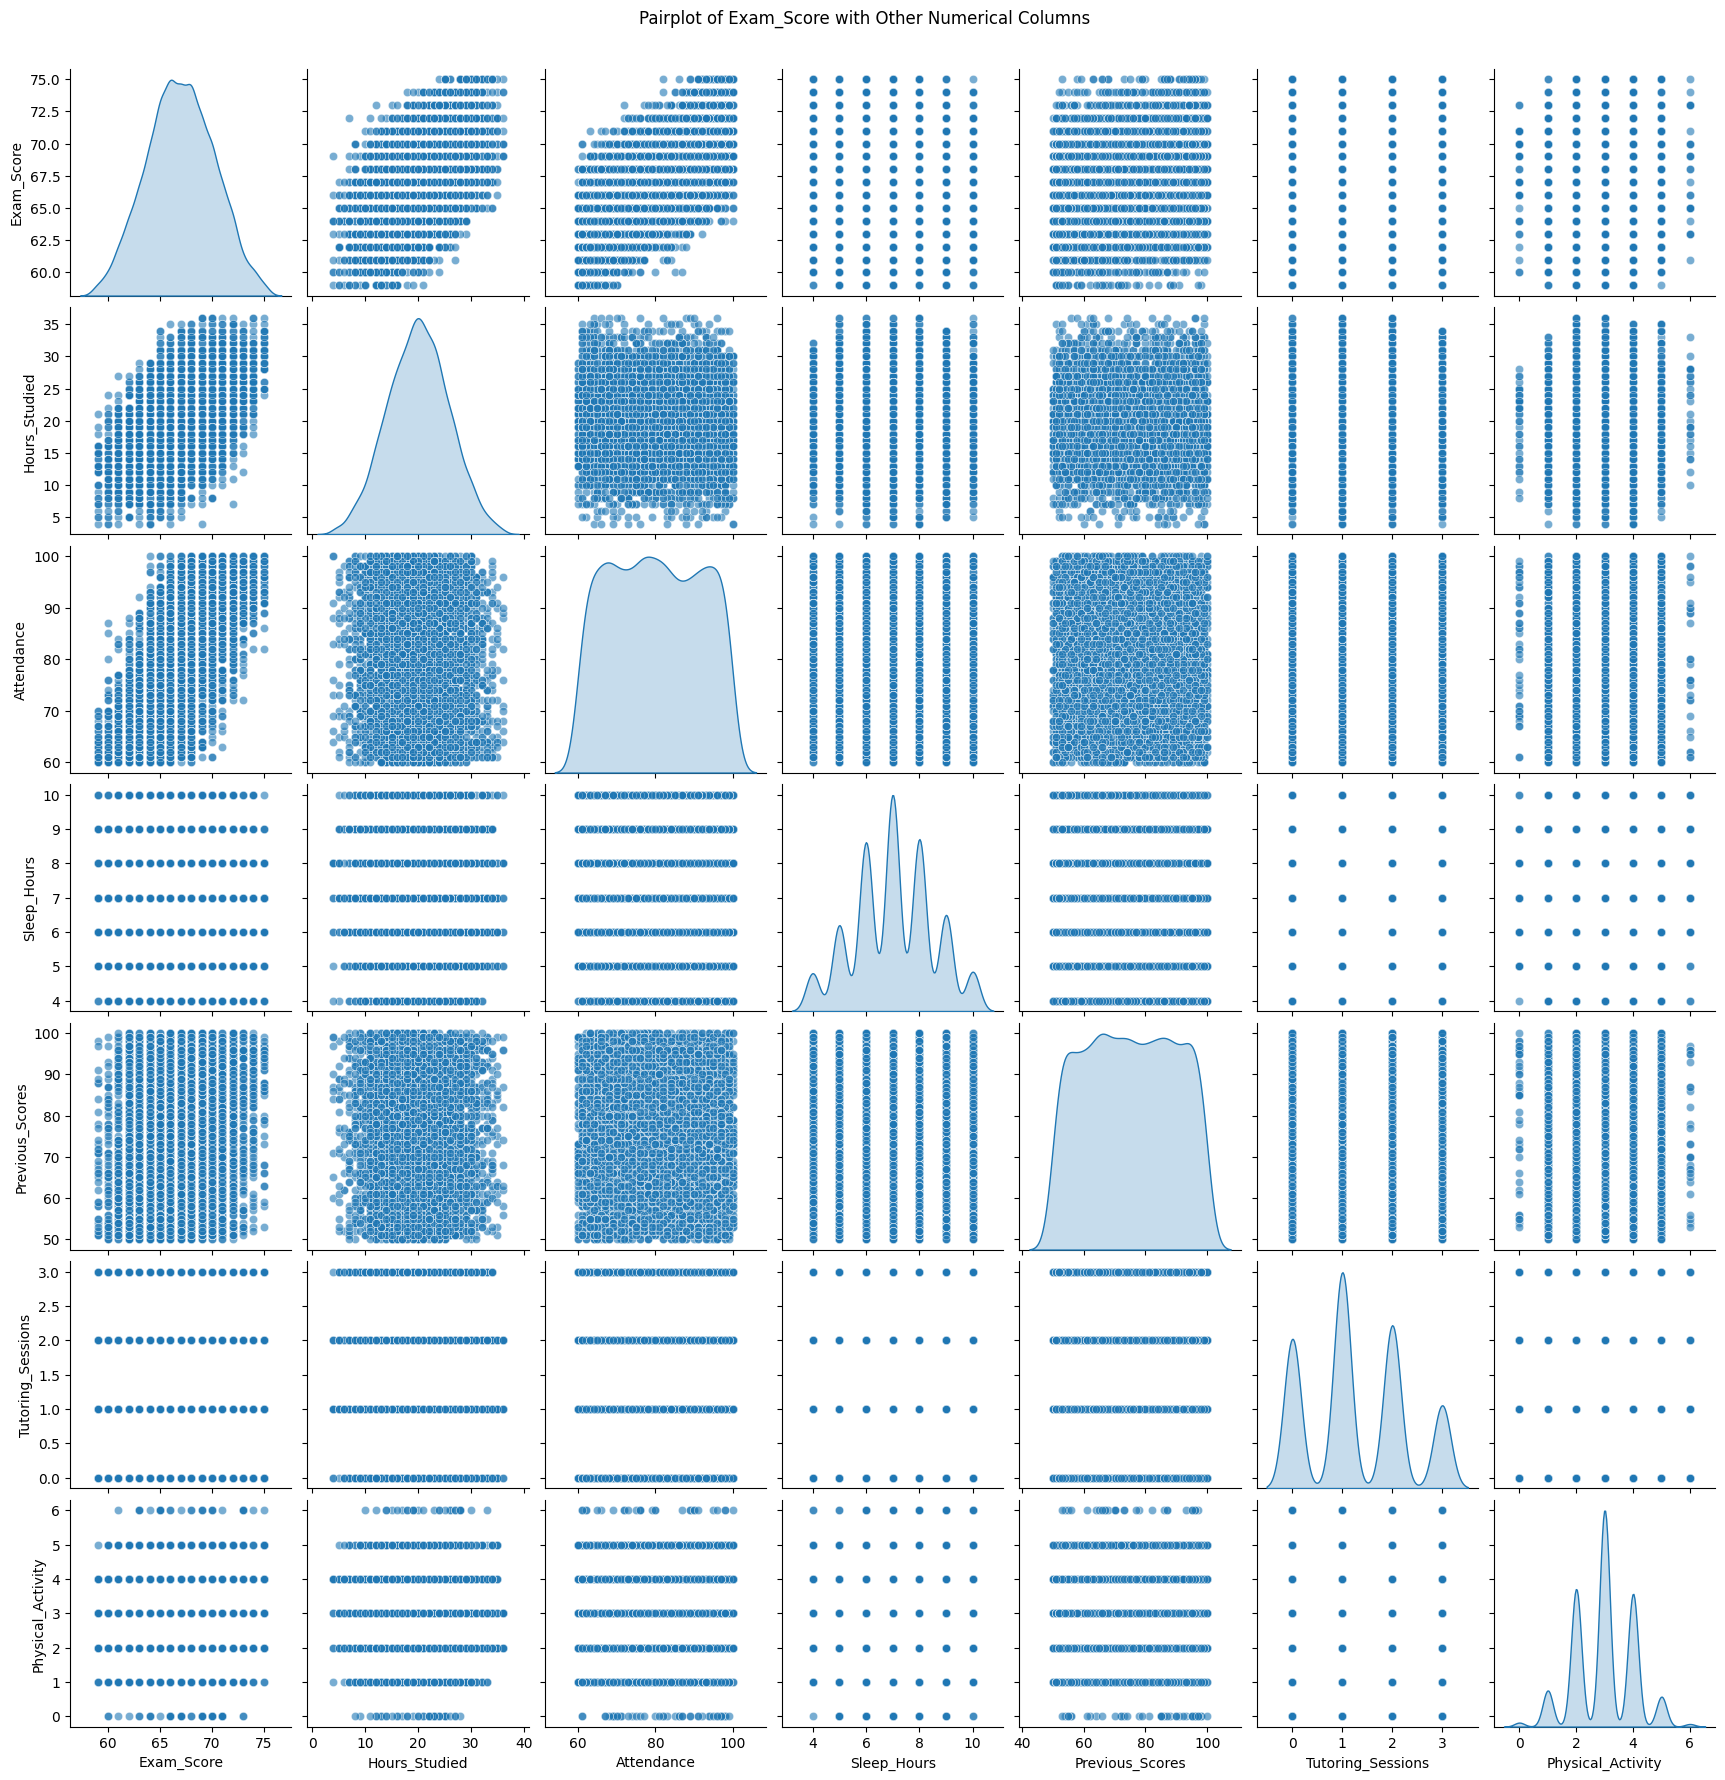

In [42]:
# Select only the columns with `Exam_Score` and other relevant numerical columns
selected_columns = ['Exam_Score'] + [col for col in numeric_cols if col != 'Exam_Score']

# Plot pairplot using seaborn
sns.pairplot(dataset[selected_columns], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Exam_Score with Other Numerical Columns', y=1.02)
plt.show()


In [47]:
# List of columns to extract
columns_to_extract = ['Exam_Score', 'Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions']

# Extract the desired columns and save into a new variable (new DataFrame)
dataset_subset = dataset[columns_to_extract]
dataset = dataset_subset
# Display the first few rows of the new dataset to confirm extraction
print(dataset.head())

dataset.corr()

dataset.to_csv('/Users/tamilselavans/Downloads/student_performance/src/dataset/dataset.csv',index=False)


   Exam_Score  Attendance  Hours_Studied  Previous_Scores  Tutoring_Sessions
0          67          84             23               73                  0
1          61          64             19               59                  2
2          74          98             24               91                  2
3          71          89             29               98                  1
4          70          92             19               65                  3
